# Smoking Death Rates

In [22]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

data = pd.read_csv("smoking-death-rate-1990-2017.csv")
print(type(data))

<class 'pandas.core.frame.DataFrame'>


## 1. Data Exploration

In [28]:
data

,Entity,Code,Year,Deaths - Cause: All causes - Risk: Smoking - Sex: Both - Age: Age-standardized (Rate),Continent,Deaths - Cause: All causes - Risk: Smoking - Sex: Both - Age: Age-standardized (Rate).1,Year.1
0,Abkhazia,OWID_ABK,2015,NaN,Asia,NaN,NaN
1,Afghanistan,AFG,1990,75.837691,NaN,81.749819,2019.0
2,Afghanistan,AFG,1991,75.635266,NaN,81.749819,2019.0
3,Afghanistan,AFG,1992,75.661050,NaN,81.749819,2019.0
4,Afghanistan,AFG,1993,76.533627,NaN,81.749819,2019.0
...,...,...,...,...,...,...,...
6916,Zimbabwe,ZWE,2016,140.488229,NaN,134.158989,2019.0
6917,Zimbabwe,ZWE,2017,138.104462,NaN,134.158989,2019.0
6918,Zimbabwe,ZWE,2018,135.939785,NaN,134.158989,2019.0
6919,Zimbabwe,ZWE,2019,134.158989,NaN,134.158989,2019.0


In [29]:
data.describe()
#The data seems to have two columns. The third and fourth column naming is similar to first only with ".1" added to it.

,Year,Deaths - Cause: All causes - Risk: Smoking - Sex: Both - Age: Age-standardized (Rate),Deaths - Cause: All causes - Risk: Smoking - Sex: Both - Age: Age-standardized (Rate).1,Year.1
count,6921.000000,6840.000000,6840.000000,6840.0
mean,2004.622887,111.450799,87.797768,2019.0
std,8.679054,56.220436,46.485922,0.0
min,1990.000000,14.020260,14.020260,2019.0
25%,1997.000000,70.764363,55.159366,2019.0
50%,2005.000000,103.143806,79.554847,2019.0
75%,2012.000000,142.553957,109.274785,2019.0
max,2019.000000,407.595206,367.999421,2019.0


In [30]:
print(data["Year"].unique())
#Unique 'Year' values show a beginning of 1990 to 2019

[2015 1990 1991 1992 1993 1994 1995 1996 1997 1998 1999 2000 2001 2002
 2003 2004 2005 2006 2007 2008 2009 2010 2011 2012 2013 2014 2016 2017
 2018 2019]


### Investigating the Second data set

In [31]:
print(data["Year.1"].unique())
#The field only contains data in 2019

[  nan 2019.]


In [32]:
print(data["Year.1"].info())

<class 'pandas.core.series.Series'>
RangeIndex: 6921 entries, 0 to 6920
Series name: Year.1
Non-Null Count  Dtype  
--------------  -----  
6840 non-null   float64
dtypes: float64(1)
memory usage: 54.2 KB
None


In [33]:
data["Year.1"].value_counts()

Year.1
2019.0    6840
Name: count, dtype: int64

In [37]:
duplicate_columns = data[["Continent", "Year.1", "Deaths - Cause: All causes - Risk: Smoking - Sex: Both - Age: Age-standardized (Rate).1"]]
duplicate_columns = duplicate_columns.rename(columns = {
    "Deaths - Cause: All causes - Risk: Smoking - Sex: Both - Age: Age-standardized (Rate).1": "Death_rate"
})

duplicate_columns

#Extracting the data and renaming the death_rate column to make it more readable

,Continent,Year.1,Death_rate
0,Asia,NaN,NaN
1,NaN,2019.0,81.749819
2,NaN,2019.0,81.749819
3,NaN,2019.0,81.749819
4,NaN,2019.0,81.749819
...,...,...,...
6916,NaN,2019.0,134.158989
6917,NaN,2019.0,134.158989
6918,NaN,2019.0,134.158989
6919,NaN,2019.0,134.158989


## Continental Data Exploration

In [40]:

continent_data = duplicate_columns[(duplicate_columns["Continent"].notna()) & (duplicate_columns["Year.1"].notna() == True)]
continent_data

#From the data we can see that the continents have different values even for the same year. We can thus deduce that continental data does not
#refer to the continental values

,Continent,Year.1,Death_rate
26,Asia,2019.0,81.749819
87,Europe,2019.0,102.612097
117,Africa,2019.0,76.340710
147,Oceania,2019.0,116.820091
177,Europe,2019.0,74.123392
...,...,...,...
6577,South America,2019.0,58.883560
6607,Asia,2019.0,109.890555
6851,Asia,2019.0,137.295599
6884,Africa,2019.0,78.316107


In [41]:
df = data[data["Year"] == 2019]
df.head(10)

,Entity,Code,Year,Deaths - Cause: All causes - Risk: Smoking - Sex: Both - Age: Age-standardized (Rate),Continent,Deaths - Cause: All causes - Risk: Smoking - Sex: Both - Age: Age-standardized (Rate).1,Year.1
30,Afghanistan,AFG,2019,81.749819,NaN,81.749819,2019.0
60,African Region (WHO),NaN,2019,51.500718,NaN,51.500718,2019.0
91,Albania,ALB,2019,102.612097,NaN,102.612097,2019.0
121,Algeria,DZA,2019,76.340710,NaN,76.340710,2019.0
151,American Samoa,ASM,2019,116.820091,NaN,116.820091,2019.0
181,Andorra,AND,2019,74.123392,NaN,74.123392,2019.0
211,Angola,AGO,2019,69.101239,NaN,69.101239,2019.0
243,Antigua and Barbuda,ATG,2019,37.751445,NaN,37.751445,2019.0
273,Argentina,ARG,2019,94.534639,NaN,94.534639,2019.0
303,Armenia,ARM,2019,117.686628,NaN,117.686628,2019.0


When factoring in 2019 only, we find that the values seem to correspond. We can thus drop the last two columns from the data

In [20]:
#Let us check the summary of the values


data["Year"].value_counts()

Year
2015    309
1990    228
2018    228
2017    228
2016    228
2014    228
2013    228
2012    228
2011    228
2010    228
2009    228
2008    228
2007    228
2006    228
2005    228
2004    228
2003    228
2002    228
2001    228
2000    228
1999    228
1998    228
1997    228
1996    228
1995    228
1994    228
1993    228
1992    228
1991    228
2019    228
Name: count, dtype: int64

In [42]:
#Even though we have the 2019 column (Year.1) on the side, it seems that the distribution of 2019 in column Year responds to the other years. 
#We thus have no need for the last two columns
del data["Year.1"]
del data["Deaths - Cause: All causes - Risk: Smoking - Sex: Both - Age: Age-standardized (Rate).1"]
data.head()

,Entity,Code,Year,Deaths - Cause: All causes - Risk: Smoking - Sex: Both - Age: Age-standardized (Rate),Continent
0,Abkhazia,OWID_ABK,2015,NaN,Asia
1,Afghanistan,AFG,1990,75.837691,NaN
2,Afghanistan,AFG,1991,75.635266,NaN
3,Afghanistan,AFG,1992,75.661050,NaN
4,Afghanistan,AFG,1993,76.533627,NaN


In [43]:
#We can rename some of the columns

data = data.rename(columns = {"Entity": "Country", "Deaths - Cause: All causes - Risk: Smoking - Sex: Both - Age: Age-standardized (Rate)": "Death Rate"})
data

,Country,Code,Year,Death Rate,Continent
0,Abkhazia,OWID_ABK,2015,NaN,Asia
1,Afghanistan,AFG,1990,75.837691,NaN
2,Afghanistan,AFG,1991,75.635266,NaN
3,Afghanistan,AFG,1992,75.661050,NaN
4,Afghanistan,AFG,1993,76.533627,NaN
...,...,...,...,...,...
6916,Zimbabwe,ZWE,2016,140.488229,NaN
6917,Zimbabwe,ZWE,2017,138.104462,NaN
6918,Zimbabwe,ZWE,2018,135.939785,NaN
6919,Zimbabwe,ZWE,2019,134.158989,NaN


We can look at the Continent variable and see if we can do anything with it

In [53]:
continent_data = data[data["Continent"].isnull() == False]

In [54]:
continent_data.head()

,Country,Code,Year,Death Rate,Continent
0,Abkhazia,OWID_ABK,2015,NaN,Asia
26,Afghanistan,AFG,2015,81.379869,Asia
61,Akrotiri and Dhekelia,OWID_AKD,2015,NaN,Asia
87,Albania,ALB,2015,101.417439,Europe
117,Algeria,DZA,2015,79.900017,Africa


In [55]:
countrylist = continent_data["Country"].unique()
countrylist.shape

(285,)

In [56]:
del continent_data["Death Rate"]
del continent_data["Code"]
del continent_data["Year"]

## Merging Everything to the Final DataFrame

In [57]:
#Merging a new continent variable into the dataframe
cdf = pd.merge(left=data, right=continent_data, how="left", on = "Country")
cdf

,Country,Code,Year,Death Rate,Continent_x,Continent_y
0,Abkhazia,OWID_ABK,2015,NaN,Asia,Asia
1,Afghanistan,AFG,1990,75.837691,NaN,Asia
2,Afghanistan,AFG,1991,75.635266,NaN,Asia
3,Afghanistan,AFG,1992,75.661050,NaN,Asia
4,Afghanistan,AFG,1993,76.533627,NaN,Asia
...,...,...,...,...,...,...
6916,Zimbabwe,ZWE,2016,140.488229,NaN,Africa
6917,Zimbabwe,ZWE,2017,138.104462,NaN,Africa
6918,Zimbabwe,ZWE,2018,135.939785,NaN,Africa
6919,Zimbabwe,ZWE,2019,134.158989,NaN,Africa


In [82]:
cdf.describe()

,Year,Death Rate
count,6921.000000,6840.000000
mean,2004.622887,111.450799
std,8.679054,56.220436
min,1990.000000,14.020260
25%,1997.000000,70.764363
50%,2005.000000,103.143806
75%,2012.000000,142.553957
max,2019.000000,407.595206


In [21]:
cdf = cdf.rename(columns = {"Continent_y": "Continent"})

cdf

,Country,Code,Year,Death Rate,Continent_x,Continent
0,Abkhazia,OWID_ABK,2015,NaN,Asia,Asia
1,Afghanistan,AFG,1990,75.837691,NaN,Asia
2,Afghanistan,AFG,1991,75.635266,NaN,Asia
3,Afghanistan,AFG,1992,75.661050,NaN,Asia
4,Afghanistan,AFG,1993,76.533627,NaN,Asia
...,...,...,...,...,...,...
6916,Zimbabwe,ZWE,2016,140.488229,NaN,Africa
6917,Zimbabwe,ZWE,2017,138.104462,NaN,Africa
6918,Zimbabwe,ZWE,2018,135.939785,NaN,Africa
6919,Zimbabwe,ZWE,2019,134.158989,NaN,Africa


In [58]:
del cdf['Continent_x']
#I also like my columns to be lower case

cdf = cdf.rename(columns = {
    "Country": "country",
    "Code": "code",
    "Death Rate": "death_rate",
    "Continent": "continent"
})
cdf

,country,code,Year,death_rate,Continent_y
0,Abkhazia,OWID_ABK,2015,NaN,Asia
1,Afghanistan,AFG,1990,75.837691,Asia
2,Afghanistan,AFG,1991,75.635266,Asia
3,Afghanistan,AFG,1992,75.661050,Asia
4,Afghanistan,AFG,1993,76.533627,Asia
...,...,...,...,...,...
6916,Zimbabwe,ZWE,2016,140.488229,Africa
6917,Zimbabwe,ZWE,2017,138.104462,Africa
6918,Zimbabwe,ZWE,2018,135.939785,Africa
6919,Zimbabwe,ZWE,2019,134.158989,Africa


In [72]:
cdf = cdf.rename(columns = {
    "Year": "year",
    "Continent_y": "continent"
})
cdf

,country,code,year,death_rate,continent
0,Abkhazia,OWID_ABK,2015,NaN,Asia
1,Afghanistan,AFG,1990,75.837691,Asia
2,Afghanistan,AFG,1991,75.635266,Asia
3,Afghanistan,AFG,1992,75.661050,Asia
4,Afghanistan,AFG,1993,76.533627,Asia
...,...,...,...,...,...
6916,Zimbabwe,ZWE,2016,140.488229,Africa
6917,Zimbabwe,ZWE,2017,138.104462,Africa
6918,Zimbabwe,ZWE,2018,135.939785,Africa
6919,Zimbabwe,ZWE,2019,134.158989,Africa


In [60]:
#Looking at time series when considering the average

yeardf = cdf.groupby("year").mean("death_rate")

In [61]:
yeardf

,death_rate
year,
1990,134.868002
1991,133.545506
1992,132.791916
1993,132.744604
1994,131.734078
1995,130.510291
1996,128.441384
1997,126.487513
1998,124.455417


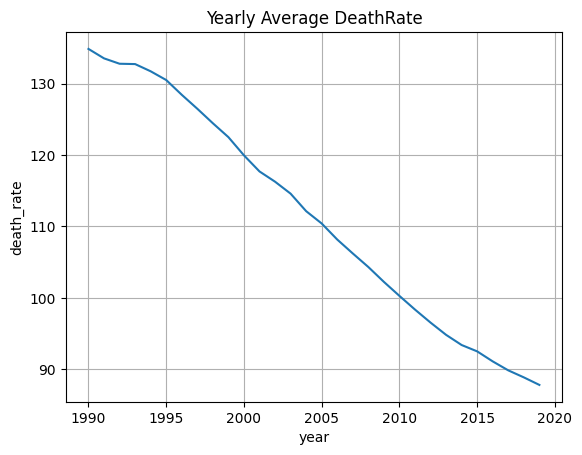

In [66]:
sns.lineplot(x="year", y="death_rate", data = yeardf)
plt.title("Yearly Average DeathRate")
plt.grid(True)

We can see on a yearly basis the number of people who have succumbed to cigarrette smoking has gone down. Take into considerations that the averages are averages of the countries averages and not weighted by population density or adjusted for age.

In [74]:
#Grouping by Year and Continent
yacdf = cdf.groupby(["year", "continent"]).mean("death_rate")
yacdf

death_rate
year continent                
1990 Africa          95.220255
     Asia           156.354232
     Europe         152.979779
     North America   88.991521
     Oceania        205.976206
...                        ...
2019 Asia           102.835602
     Europe          93.816809
     North America   57.039623
     Oceania        155.128758
     South America   59.396834

[181 rows x 1 columns]

<Axes: xlabel='year', ylabel='death_rate'>

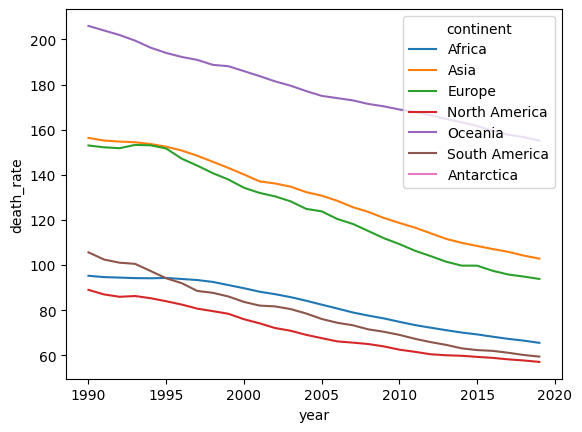

In [75]:
sns.lineplot(x="year", y="death_rate", hue="continent", data = yacdf)

We can see death rates from smoking have drastically declined from all continents

<Axes: xlabel='death_rate', ylabel='Count'>

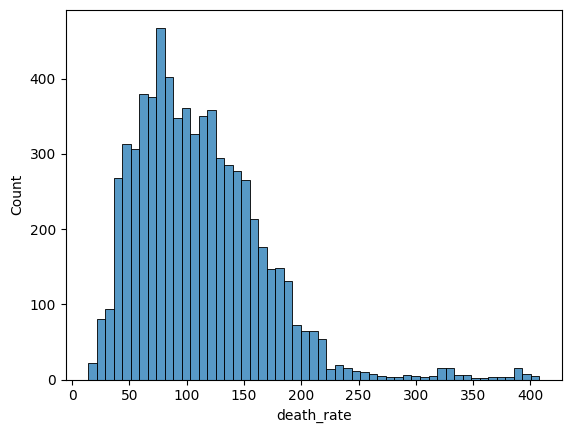

In [76]:
sns.histplot(x=cdf["death_rate"])

In [33]:
cdf["death_rate"].kurt()

3.840023288997402

In [34]:
cdf["death_rate"].skew()

1.4009628367559865

The data seems to be fairly skewed

<Axes: xlabel='Deaths - Cause: All causes - Risk: Smoking - Sex: Both - Age: Age-standardized (Rate)', ylabel='Count'>

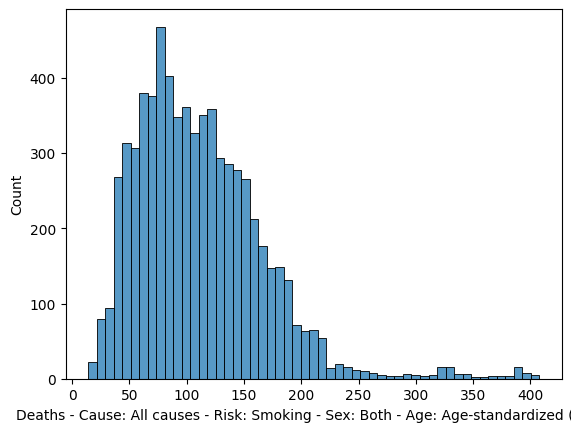

In [35]:
sns.histplot(x=data["Deaths - Cause: All causes - Risk: Smoking - Sex: Both - Age: Age-standardized (Rate)"])

## A Linear Regression Model

In [78]:
yeardf.reset_index(inplace = True)
yeardf

,year,death_rate
0,1990,134.868002
1,1991,133.545506
2,1992,132.791916
3,1993,132.744604
4,1994,131.734078
5,1995,130.510291
6,1996,128.441384
7,1997,126.487513
8,1998,124.455417
9,1999,122.508339


In [79]:
from sklearn import linear_model

lin_reg = linear_model.LinearRegression()

x = yeardf[["year"]]  #Doing this will turn the variable x to a dataframe rather than a series
y = yeardf["death_rate"]

lin_reg.fit(x, y)



LinearRegression()

In [73]:
lin_reg.score(x, y)

0.9932462681301515

An R-Squared value of 99% indicates that 99% of the variation in smoking death rates can be attributed to the year.

### Plotting Predicted Values vs Actual Values

In [91]:
predicted = lin_reg.predict(pd.DataFrame(range(1990, 2030, 1)))

C:\Users\Edwin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


Text(0.5, 1.0, 'Predicted Death Rates with Actual Death Rates')

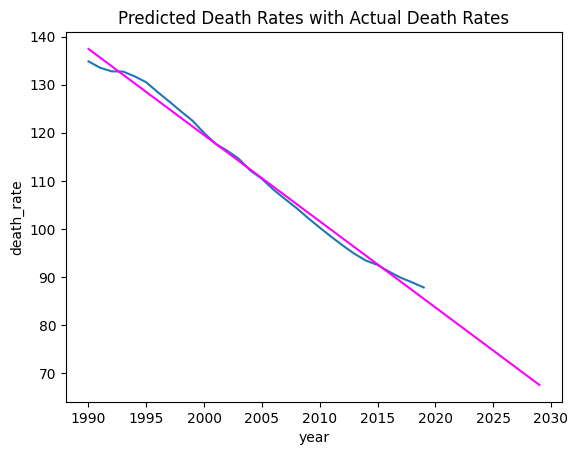

In [89]:
sns.lineplot(x = yeardf["year"], y = "death_rate", data = yeardf)
plt.plot(range(1990, 2030, 1), predicted, color = "magenta")
plt.title("Predicted Death Rates with Actual Death Rates")